# Python code to read and visualize the customer data using librarires.

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
df = pd.read_csv('Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [135]:
# After reading the customer.csv file into df, now looking for data which is missing in few columns
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

# Found 35 records in profession are having null values as shown below

In [136]:
#viewing the rows with nan in any column
na_rows = df[df.isna().any(axis = 1)]
na_rows

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


# Using Bar chart for Professions with Gender, Crosstab pandas function. Summing and sorting Female and Male gender. 
# what are the distribution of Gender among varies professions.

[Text(0, 0, '232'),
 Text(0, 0, '143'),
 Text(0, 0, '101'),
 Text(0, 0, '76'),
 Text(0, 0, '72'),
 Text(0, 0, '66'),
 Text(0, 0, '56'),
 Text(0, 0, '32'),
 Text(0, 0, '21')]

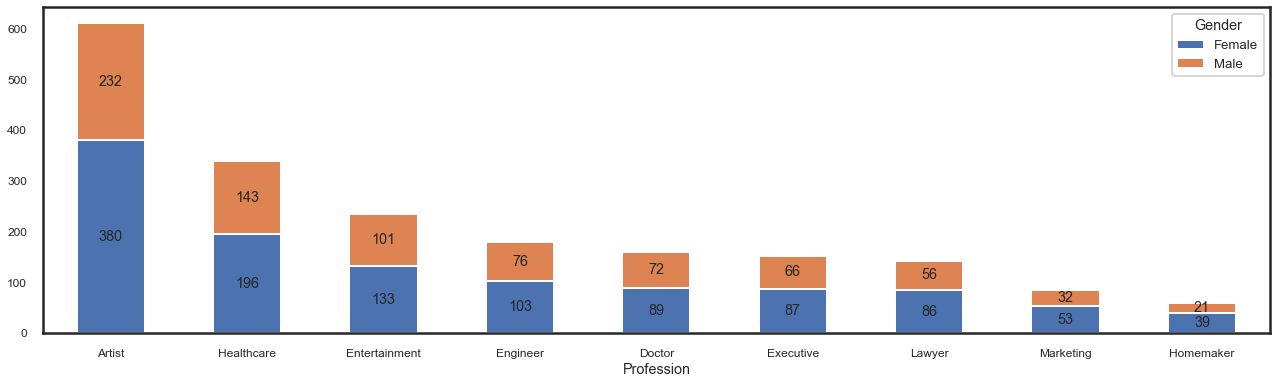

In [137]:
df_profession = pd.crosstab(df['Profession'],df['Gender'])
sorted_indices = (df_profession["Female"] + df_profession["Male"]).sort_values(ascending=False).index
ax=df_profession.loc[sorted_indices, :].plot(kind="bar",stacked=True, figsize=(22,6))
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

ax.bar_label(ax.containers[0],label_type='center')
ax.bar_label(ax.containers[1],label_type='center')

In [138]:
# Calculate the percentage of each gender for available data
profession_pct = df[~df['Profession'].isna()].groupby(['Profession'])['Profession'].count() / len(df[~df['Profession'].isna()])

# Calculate the percentage of each gender for available data
gender_pct = df.groupby(['Gender'])['Gender'].count() / len(df)

# Fill in missing profession values
for i, row in df[df['Profession'].isna()].iterrows():
    profession = np.random.choice(profession_pct.index, p=profession_pct.values)
    gender = row['Gender']
    df.at[i, 'Profession'] = profession
    df.at[i, 'Gender'] = gender

[Text(0, 0, '241'),
 Text(0, 0, '144'),
 Text(0, 0, '101'),
 Text(0, 0, '77'),
 Text(0, 0, '74'),
 Text(0, 0, '67'),
 Text(0, 0, '57'),
 Text(0, 0, '32'),
 Text(0, 0, '21')]

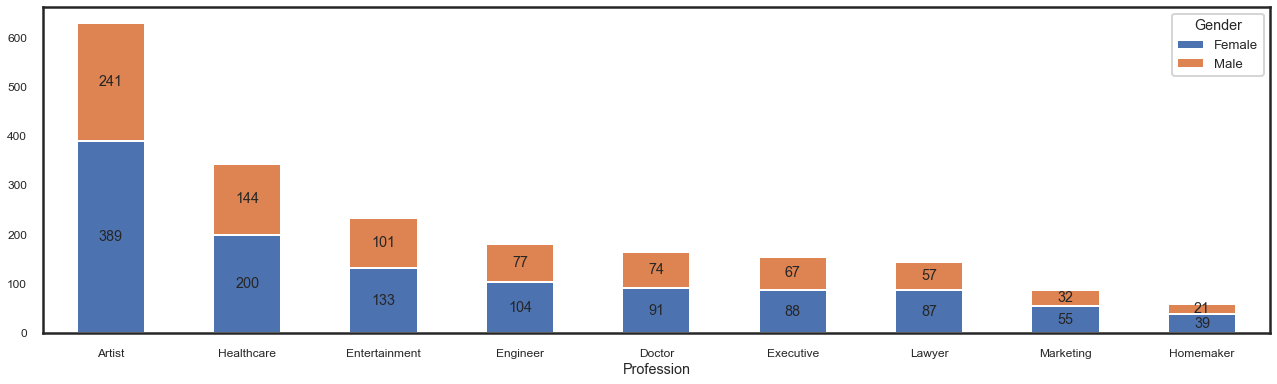

In [139]:
#Filling the NaN Values with the most frequent occuring value from given data and displaying the increased count of Artist
df_profession = pd.crosstab(df['Profession'],df['Gender'])
sorted_indices = (df_profession["Female"] + df_profession["Male"]).sort_values(ascending=False).index
ax=df_profession.loc[sorted_indices, :].plot(kind="bar",stacked=True, figsize=(22,6))
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

ax.bar_label(ax.containers[0],label_type='center')
ax.bar_label(ax.containers[1],label_type='center')

# Can we predict which profession has a higher likelihood of having customers with a membership and age above 25?

In [140]:
#################Question 1################
df_professions = df['Profession'].unique()
mean_age = []

for profession in df_professions:
    mean_age_value = df.loc[df['Profession'] == profession, 'Age'].mean()
    median_age_value = df.loc[df['Profession'] == profession, 'Age'].median()
    mode_age_value = df.loc[df['Profession'] == profession, 'Age'].mode()
    print(f"Mean age for profession {profession}: {mean_age_value:.2f}")
    print(f"Median age for profession {profession}: {median_age_value:.2f}")
    print(f"Mode age for profession {profession}: {mode_age_value.values[0]:.2f}")

Mean age for profession Healthcare: 47.76
Median age for profession Healthcare: 47.00
Mode age for profession Healthcare: 21.00
Mean age for profession Engineer: 55.19
Median age for profession Engineer: 58.00
Mode age for profession Engineer: 52.00
Mean age for profession Lawyer: 47.76
Median age for profession Lawyer: 48.00
Mode age for profession Lawyer: 54.00
Mean age for profession Entertainment: 51.16
Median age for profession Entertainment: 50.00
Mode age for profession Entertainment: 73.00
Mean age for profession Artist: 48.95
Median age for profession Artist: 47.00
Mode age for profession Artist: 30.00
Mean age for profession Executive: 46.93
Median age for profession Executive: 47.00
Mode age for profession Executive: 92.00
Mean age for profession Doctor: 46.93
Median age for profession Doctor: 48.00
Mode age for profession Doctor: 59.00
Mean age for profession Homemaker: 45.37
Median age for profession Homemaker: 41.00
Mode age for profession Homemaker: 22.00
Mean age for pr

In [141]:
# Calculate the interquartile range for each profession
for profession in professions:
    Q1 = df[df['Profession'] == profession]['Age'].quantile(0.25)
    Q3 = df[df['Profession'] == profession]['Age'].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Q1 for {profession} = {Q1:.2f}")
    print(f"IQR for {profession} = {IQR:.2f}")
    print(f"Q3 for {profession} = {Q3:.2f}")

Q1 for Healthcare = 23.75
IQR for Healthcare = 44.25
Q3 for Healthcare = 68.00
Q1 for Engineer = 31.00
IQR for Engineer = 49.00
Q3 for Engineer = 80.00
Q1 for Lawyer = 24.75
IQR for Lawyer = 48.25
Q3 for Lawyer = 73.00
Q1 for Entertainment = 27.00
IQR for Entertainment = 52.00
Q3 for Entertainment = 79.00
Q1 for Artist = 25.00
IQR for Artist = 46.75
Q3 for Artist = 71.75
Q1 for Executive = 25.00
IQR for Executive = 47.50
Q3 for Executive = 72.50
Q1 for Doctor = 21.00
IQR for Doctor = 50.00
Q3 for Doctor = 71.00
Q1 for Homemaker = 22.00
IQR for Homemaker = 46.00
Q3 for Homemaker = 68.00
Q1 for Marketing = 20.50
IQR for Marketing = 53.00
Q3 for Marketing = 73.50
Q1 for nan = nan
IQR for nan = nan
Q3 for nan = nan


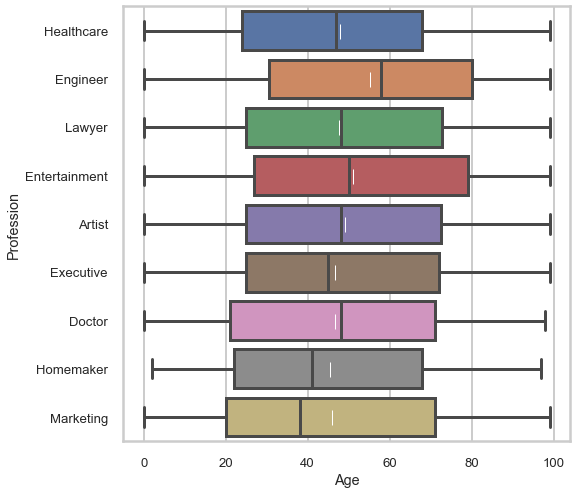

In [94]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.set_context("poster",font_scale=0.6)
sns.boxplot(data=df,y='Profession',x='Age',
            showmeans=True, meanprops={"marker": "|",
                       "markeredgecolor": "white",
                       "markersize": "15"})
plt.show()

# What is the relationship between the spending score and the family size of customers? Can we predict the maximum, minimum, and average family size of customers with the highest and lowest spending scores?

In [142]:
df_Family_Size  = df['Family Size'].unique()

for Size in df_Family_Size:
    mean_size_value = df.loc[df['Family Size'] == Size, 'Spending Score (1-100)'].mean()
    median_size_value = df.loc[df['Family Size'] == Size, 'Spending Score (1-100)'].median()
    mode_size_value = df.loc[df['Family Size'] == Size, 'Spending Score (1-100)'].mode()
    print(f"Mean score for Family Size {Size}: {mean_size_value:.2f}")
    print(f"Median score for Family Size {Size}: {median_size_value:.2f}")
    print(f"Mode score for Family Size {Size}: {mode_size_value.values[0]:.2f}")

Mean score for Family Size 4: 52.71
Median score for Family Size 4: 51.00
Mode score for Family Size 4: 99.00
Mean score for Family Size 3: 51.95
Median score for Family Size 3: 53.00
Mode score for Family Size 3: 17.00
Mean score for Family Size 1: 49.65
Median score for Family Size 1: 48.00
Mode score for Family Size 1: 41.00
Mean score for Family Size 2: 50.36
Median score for Family Size 2: 50.00
Mode score for Family Size 2: 47.00
Mean score for Family Size 6: 49.94
Median score for Family Size 6: 50.00
Mode score for Family Size 6: 60.00
Mean score for Family Size 5: 52.18
Median score for Family Size 5: 51.00
Mode score for Family Size 5: 73.00
Mean score for Family Size 8: 49.25
Median score for Family Size 8: 49.00
Mode score for Family Size 8: 0.00
Mean score for Family Size 7: 49.99
Median score for Family Size 7: 49.00
Mode score for Family Size 7: 70.00
Mean score for Family Size 9: 17.00
Median score for Family Size 9: 17.00
Mode score for Family Size 9: 17.00


In [143]:
# Calculate the interquartile range for each profession
for Size in df_Family_Size:
    Q1 = df[df['Family Size'] == Size]['Spending Score (1-100)'].quantile(0.25)
    Q3 = df[df['Family Size'] == Size]['Spending Score (1-100)'].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Q1 for Family Size {Size} = {Q1:.2f}")
    print(f"IQR for Family Size {Size} = {IQR:.2f}")
    print(f"Q3 for Family Size {Size} = {Q3:.2f}")

Q1 for Family Size 4 = 30.00
IQR for Family Size 4 = 48.00
Q3 for Family Size 4 = 78.00
Q1 for Family Size 3 = 24.00
IQR for Family Size 3 = 52.00
Q3 for Family Size 3 = 76.00
Q1 for Family Size 1 = 26.00
IQR for Family Size 1 = 46.50
Q3 for Family Size 1 = 72.50
Q1 for Family Size 2 = 28.00
IQR for Family Size 2 = 48.00
Q3 for Family Size 2 = 76.00
Q1 for Family Size 6 = 24.50
IQR for Family Size 6 = 48.00
Q3 for Family Size 6 = 72.50
Q1 for Family Size 5 = 32.25
IQR for Family Size 5 = 41.50
Q3 for Family Size 5 = 73.75
Q1 for Family Size 8 = 24.00
IQR for Family Size 8 = 50.25
Q3 for Family Size 8 = 74.25
Q1 for Family Size 7 = 29.00
IQR for Family Size 7 = 41.75
Q3 for Family Size 7 = 70.75
Q1 for Family Size 9 = 17.00
IQR for Family Size 9 = 0.00
Q3 for Family Size 9 = 17.00


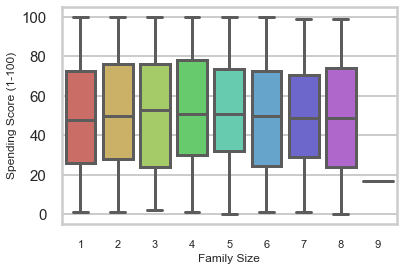

In [144]:
#############Question 2#################scatter plot of spending score and family size?
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.5)
plt.tick_params(axis='y', labelsize=15)
sns.boxplot(data=df,y='Spending Score (1-100)',x='Family Size',palette='hls')
plt.show()

<AxesSubplot:xlabel='Family Size', ylabel='Spending Score (1-100)'>

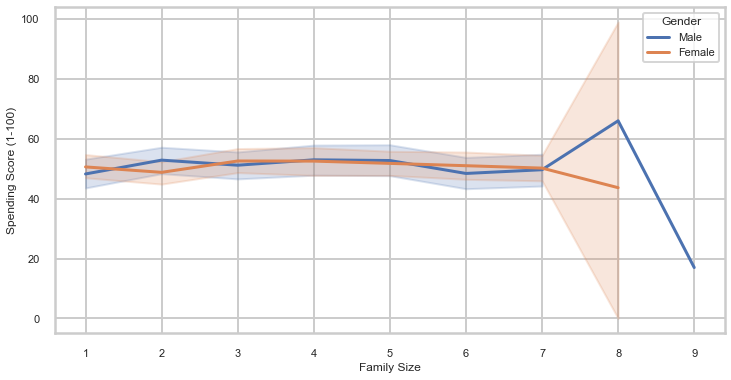

In [145]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Family Size',y='Spending Score (1-100)',\
             hue='Gender')

# What is the most likely profession or group of professions that have the highest spending score among customers?

In [146]:
df_professions = df['Profession'].unique()
#mean_age = []

for profession in df_professions:
    mean_score_value = df.loc[df['Profession'] == profession, 'Spending Score (1-100)'].mean()
    median_score_value = df.loc[df['Profession'] == profession, 'Spending Score (1-100)'].median()
    mode_score_value = df.loc[df['Profession'] == profession, 'Spending Score (1-100)'].mode()
    print(f"Mean Spending Score (1-100) for profession {profession}: {mean_score_value:.2f}")
    print(f"Median Spending Score (1-100) for profession {profession}: {median_score_value:.2f}")
    print(f"Mode Spending Score (1-100) for profession {profession}: {mode_score_value.values[0]:.2f}")

Mean Spending Score (1-100) for profession Healthcare: 50.43
Median Spending Score (1-100) for profession Healthcare: 51.00
Mode Spending Score (1-100) for profession Healthcare: 14.00
Mean Spending Score (1-100) for profession Engineer: 48.80
Median Spending Score (1-100) for profession Engineer: 47.00
Mode Spending Score (1-100) for profession Engineer: 45.00
Mean Spending Score (1-100) for profession Lawyer: 49.11
Median Spending Score (1-100) for profession Lawyer: 49.50
Mode Spending Score (1-100) for profession Lawyer: 46.00
Mean Spending Score (1-100) for profession Entertainment: 52.94
Median Spending Score (1-100) for profession Entertainment: 53.00
Mode Spending Score (1-100) for profession Entertainment: 49.00
Mean Spending Score (1-100) for profession Artist: 52.38
Median Spending Score (1-100) for profession Artist: 52.00
Mode Spending Score (1-100) for profession Artist: 55.00
Mean Spending Score (1-100) for profession Executive: 50.01
Median Spending Score (1-100) for pr

In [147]:
# Calculate the interquartile range for each profession
for profession in professions:
    Q1 = df[df['Profession'] == profession]['Spending Score (1-100)'].quantile(0.25)
    Q3 = df[df['Profession'] == profession]['Spending Score (1-100)'].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Q1 for profession {profession} = {Q1:.2f}")
    print(f"IQR for profession {profession} = {IQR:.2f}")
    print(f"Q3 for profession {profession} = {Q3:.2f}")

Q1 for profession Healthcare = 25.75
IQR for profession Healthcare = 48.25
Q3 for profession Healthcare = 74.00
Q1 for profession Engineer = 27.00
IQR for profession Engineer = 43.00
Q3 for profession Engineer = 70.00
Q1 for profession Lawyer = 24.75
IQR for profession Lawyer = 49.25
Q3 for profession Lawyer = 74.00
Q1 for profession Entertainment = 32.00
IQR for profession Entertainment = 43.75
Q3 for profession Entertainment = 75.75
Q1 for profession Artist = 28.00
IQR for profession Artist = 48.00
Q3 for profession Artist = 76.00
Q1 for profession Executive = 28.00
IQR for profession Executive = 46.50
Q3 for profession Executive = 74.50
Q1 for profession Doctor = 32.00
IQR for profession Doctor = 44.00
Q3 for profession Doctor = 76.00
Q1 for profession Homemaker = 28.50
IQR for profession Homemaker = 31.25
Q3 for profession Homemaker = 59.75
Q1 for profession Marketing = 24.50
IQR for profession Marketing = 48.00
Q3 for profession Marketing = 72.50
Q1 for profession nan = nan
IQR fo

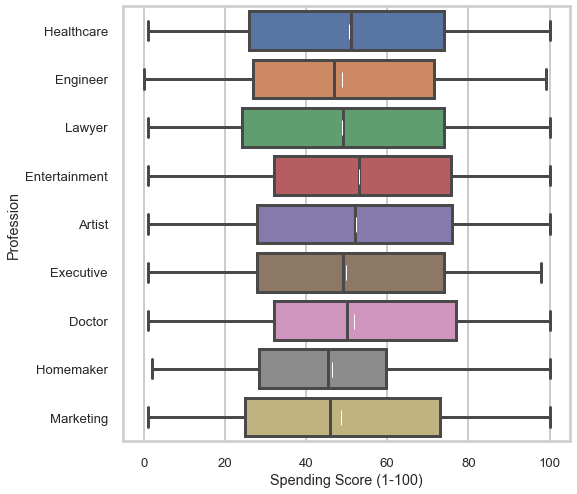

In [99]:
##########################Question 3############################
#
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.set_context("poster",font_scale=0.6)
sns.boxplot(data=df,y='Profession',x='Spending Score (1-100)',
           showmeans=True, meanprops={"marker": "|",
                       "markeredgecolor": "white",
                       "markersize": "15"})
#print(meanprops)
plt.show()

# What is the relationship between annual income and spending score of customers with the highest spending score? Can we predict the range of annual income of the customer with the highest spending score?

# What is the gender distribution of customers with an annual income above 50000 who have the highest spending scores?

In [148]:
Male_df = df[df['Gender'] == 'Male']
Female_df = df[df['Gender'] == 'Female']
#mean of Spending Score
Male_mean_Spending_Score = Male_df['Spending Score (1-100)'].mean()
Female_mean_Spending_Score = Female_df['Spending Score (1-100)'].mean()
print("Male mean of Spending Score (1-100) : ",Male_mean_Spending_Score)
print("Female mean of Spending Score (1-100) : ",Female_mean_Spending_Score)
#median of Spending Score
Male_median_Spending_Score = Male_df['Spending Score (1-100)'].median()
Female_median_Spending_Score = Female_df['Spending Score (1-100)'].median()
print("Male median of Spending Score (1-100) : ",Male_median_Spending_Score)
print("Female median of Spending Score (1-100) : ",Female_median_Spending_Score)
#mode of Spending Score
Male_mode_Spending_Score = Male_df['Spending Score (1-100)'].mode()
Female_mode_Spending_Score = Female_df['Spending Score (1-100)'].mode()
print("Male mode of Spending Score (1-100) : ",Male_mode_Spending_Score)
print("Female mode of Spending Score (1-100) : ",Female_mode_Spending_Score)

Male mean of Spending Score (1-100) :  50.94471744471745
Female mean of Spending Score (1-100) :  50.974704890387855
Male median of Spending Score (1-100) :  51.0
Female median of Spending Score (1-100) :  50.0
Male mode of Spending Score (1-100) :  0    42
Name: Spending Score (1-100), dtype: int64
Female mode of Spending Score (1-100) :  0    17
Name: Spending Score (1-100), dtype: int64


In [149]:
# Calculate the 25th and 75th percentiles for Male
Q1 = Male_df['Spending Score (1-100)'].quantile(0.25)
Q3 = Male_df['Spending Score (1-100)'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
print("Q1 25th percentile of Spending Score (1-100):", Q1)
print("Q3 75th percentile of Spending Score (1-100):", Q3)
print("Interquartile range (IQR) of Spending Score (1-100): ", IQR)

Q1 25th percentile of Spending Score (1-100): 28.0
Q3 75th percentile of Spending Score (1-100): 75.0
Interquartile range (IQR) of Spending Score (1-100):  47.0


In [150]:
# Calculate the 25th and 75th percentiles for Male
Q1 = Female_df['Spending Score (1-100)'].quantile(0.25)
Q3 = Female_df['Spending Score (1-100)'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
print("Q1 25th percentile of Spending Score (1-100):", Q1)
print("Q3 75th percentile of Spending Score (1-100):", Q3)
print("Interquartile range (IQR) of Spending Score (1-100): ", IQR)

Q1 25th percentile of Spending Score (1-100): 28.0
Q3 75th percentile of Spending Score (1-100): 75.0
Interquartile range (IQR) of Spending Score (1-100):  47.0


In [151]:
# Calculate the 25th and 75th percentiles
Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
print("Q1 25th percentile of Spending Score (1-100):", Q1)
print("Q3 75th percentile of Spending Score (1-100):", Q3)
print("Interquartile range (IQR) of Spending Score (1-100): ", IQR)

Q1 25th percentile of Spending Score (1-100): 28.0
Q3 75th percentile of Spending Score (1-100): 75.0
Interquartile range (IQR) of Spending Score (1-100):  47.0


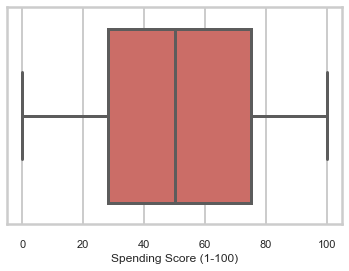

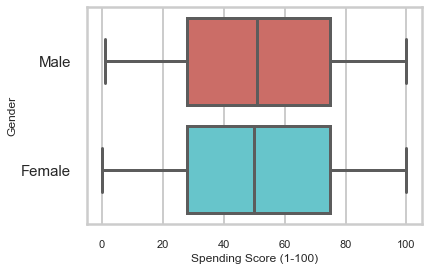

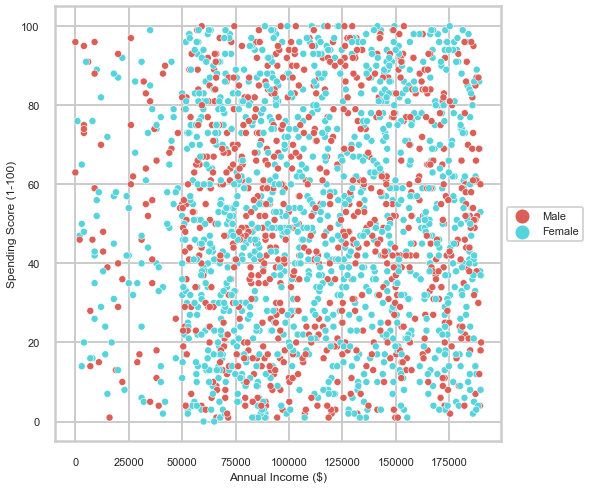

In [152]:
#################question 4 & 5################################# profession, gender, spending score bar plot 
#income, age, spending score bar plot
#
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.5)
plt.tick_params(axis='y', labelsize=15)
sns.boxplot(data=df,x='Spending Score (1-100)',palette='hls')
plt.show()
#########
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.5)
plt.tick_params(axis='y', labelsize=15)
sns.boxplot(data=df,x='Spending Score (1-100)',y='Gender',palette='hls')
plt.show()
####
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x='Annual Income ($)',y='Spending Score (1-100)',hue='Gender',palette='hls',s=50)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# What Family size group has the highest frequency of shopping among customers?

In [153]:
##############################Question 6##########################################################
#is there a particular Family Size group among them that has a high frequency of shopping?
df.rename(columns={"Spending Score (1-100)":"Spending_score","Family Size":"Family_size"},inplace=True)
df.Family_size.value_counts().head()

2    361
3    311
1    299
4    289
5    258
Name: Family_size, dtype: int64

<AxesSubplot:>

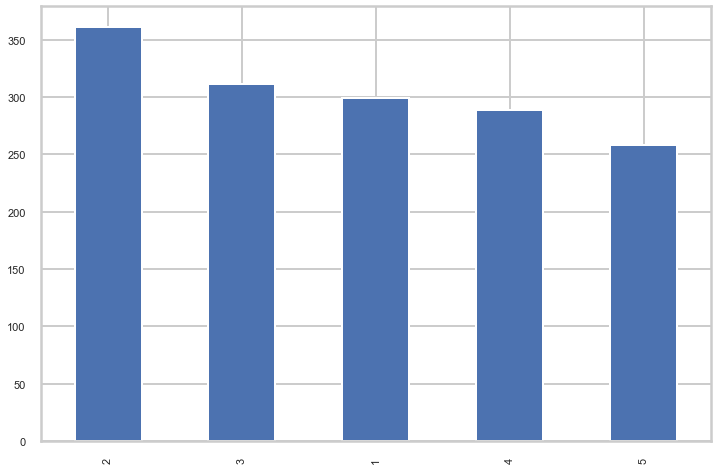

In [154]:
df.Family_size.value_counts().head().plot(kind="bar",figsize=(12,8))

In [ ]:
# It has been observed that people who frequently shop have a higher likelihood of belonging to households with 2, 3, or 1 
#family members in that order, compared to households with 4 or 5 family members.

In [155]:
# counting the number of males and females by profession
m_f = df.groupby("Gender")["Profession"].value_counts().reset_index(name = "Count")
m_f

,Gender,Profession,Count
0,Female,Artist,389
1,Female,Healthcare,200
2,Female,Entertainment,133
3,Female,Engineer,104
4,Female,Doctor,91
5,Female,Executive,88
6,Female,Lawyer,87
7,Female,Marketing,55
8,Female,Homemaker,39
9,Male,Artist,241


# What is the most common profession that has both a high mean income and a high mean spending score among customers? 

In [157]:
###############################Question 7######################################
#what profession are having mean income and mean spending score?
prof_mean_inc = round(df.groupby("Profession")[["Annual Income ($)", "Spending_score"]].mean(),2).reset_index()
prof_mean_inc.columns = ["profession", "annual_income", "spending_score"]
prof_mean_inc = prof_mean_inc.sort_values("spending_score", ascending = False)
prof_mean_inc

,profession,annual_income,spending_score
3,Entertainment,110650.33,52.94
0,Artist,108946.31,52.38
1,Doctor,111497.88,51.66
5,Healthcare,112651.90,50.43
4,Executive,114262.43,50.01
7,Lawyer,110547.01,49.11
2,Engineer,111592.04,48.80
8,Marketing,108422.55,48.59
6,Homemaker,108758.62,46.38


In [158]:
#comparing the profession their mean income and spending score through bar
px.bar(prof_mean_inc, x = "profession", y = "spending_score", text = "annual_income", color = "annual_income",
      width = 800, color_continuous_scale = "turbo_r").update_layout(title = "Comparing Profession with Annual Income and Spending Score(1-100)").update_traces(
textposition = "outside")